In [5]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker and random seed
fake = Faker()
np.random.seed(42)

# Number of students
n = 200

# Create data dictionary
data = {
    "student_id": list(range(1, n + 1)),
    "name": [fake.name() for _ in range(n)],
    "class": np.random.choice(["10th", "11th", "12th"], size=n),
    "comprehension": np.random.uniform(40, 100, size=n).round(2),
    "attention": np.random.uniform(30, 100, size=n).round(2),
    "focus": np.random.uniform(20, 100, size=n).round(2),
    "retention": np.random.uniform(30, 100, size=n).round(2),
    "engagement_time": np.random.uniform(60, 300, size=n).round(2)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate assessment_score based on other metrics
df["assessment_score"] = (
    df["comprehension"] * 0.3 +
    df["attention"] * 0.2 +
    df["focus"] * 0.2 +
    df["retention"] * 0.2 +
    np.random.uniform(-5, 5, size=n)
).round(2).clip(0, 100)

# Save to CSV
df.to_csv("student_data.csv", index=False)

print("Dataset created successfully!")


Dataset created successfully!


In [6]:
df = pd.read_csv("student_data.csv")

print(df.dtypes)


student_id            int64
name                 object
class                object
comprehension       float64
attention           float64
focus               float64
retention           float64
engagement_time     float64
assessment_score    float64
dtype: object


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student_data.csv")

# Check that all columns have correct data types
print(df.dtypes)


student_id            int64
name                 object
class                object
comprehension       float64
attention           float64
focus               float64
retention           float64
engagement_time     float64
assessment_score    float64
dtype: object


In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

print(numeric_df.head())


   student_id  comprehension  attention  focus  retention  engagement_time  \
0           1          64.23      42.27  39.29      61.64           187.12   
1           2          43.89      31.20  36.40      79.96           255.61   
2           3          55.23      83.44  40.12      92.98           179.54   
3           4          54.81      86.48  41.98      73.69            76.12   
4           5          81.78      54.24  36.58      67.78           157.26   

   assessment_score  
0             51.74  
1             42.84  
2             63.94  
3             57.59  
4             57.88  


In [9]:
# Calculate correlation matrix
correlation = numeric_df.corr()

# Show correlation with assessment_score sorted
print(correlation["assessment_score"].sort_values(ascending=False))


assessment_score    1.000000
comprehension       0.551880
focus               0.477919
attention           0.472767
retention           0.462828
engagement_time    -0.049049
student_id         -0.049921
Name: assessment_score, dtype: float64


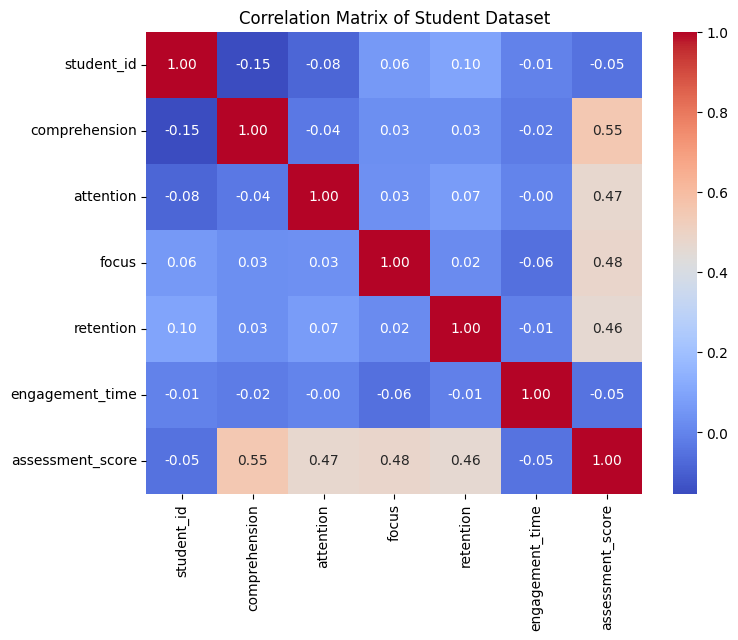

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Dataset")
plt.show()


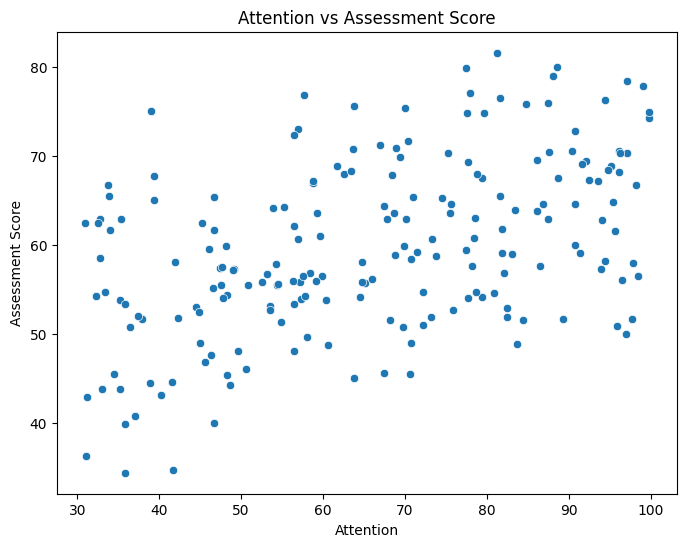

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="attention", y="assessment_score", data=df)
plt.title("Attention vs Assessment Score")
plt.xlabel("Attention")
plt.ylabel("Assessment Score")
plt.show()


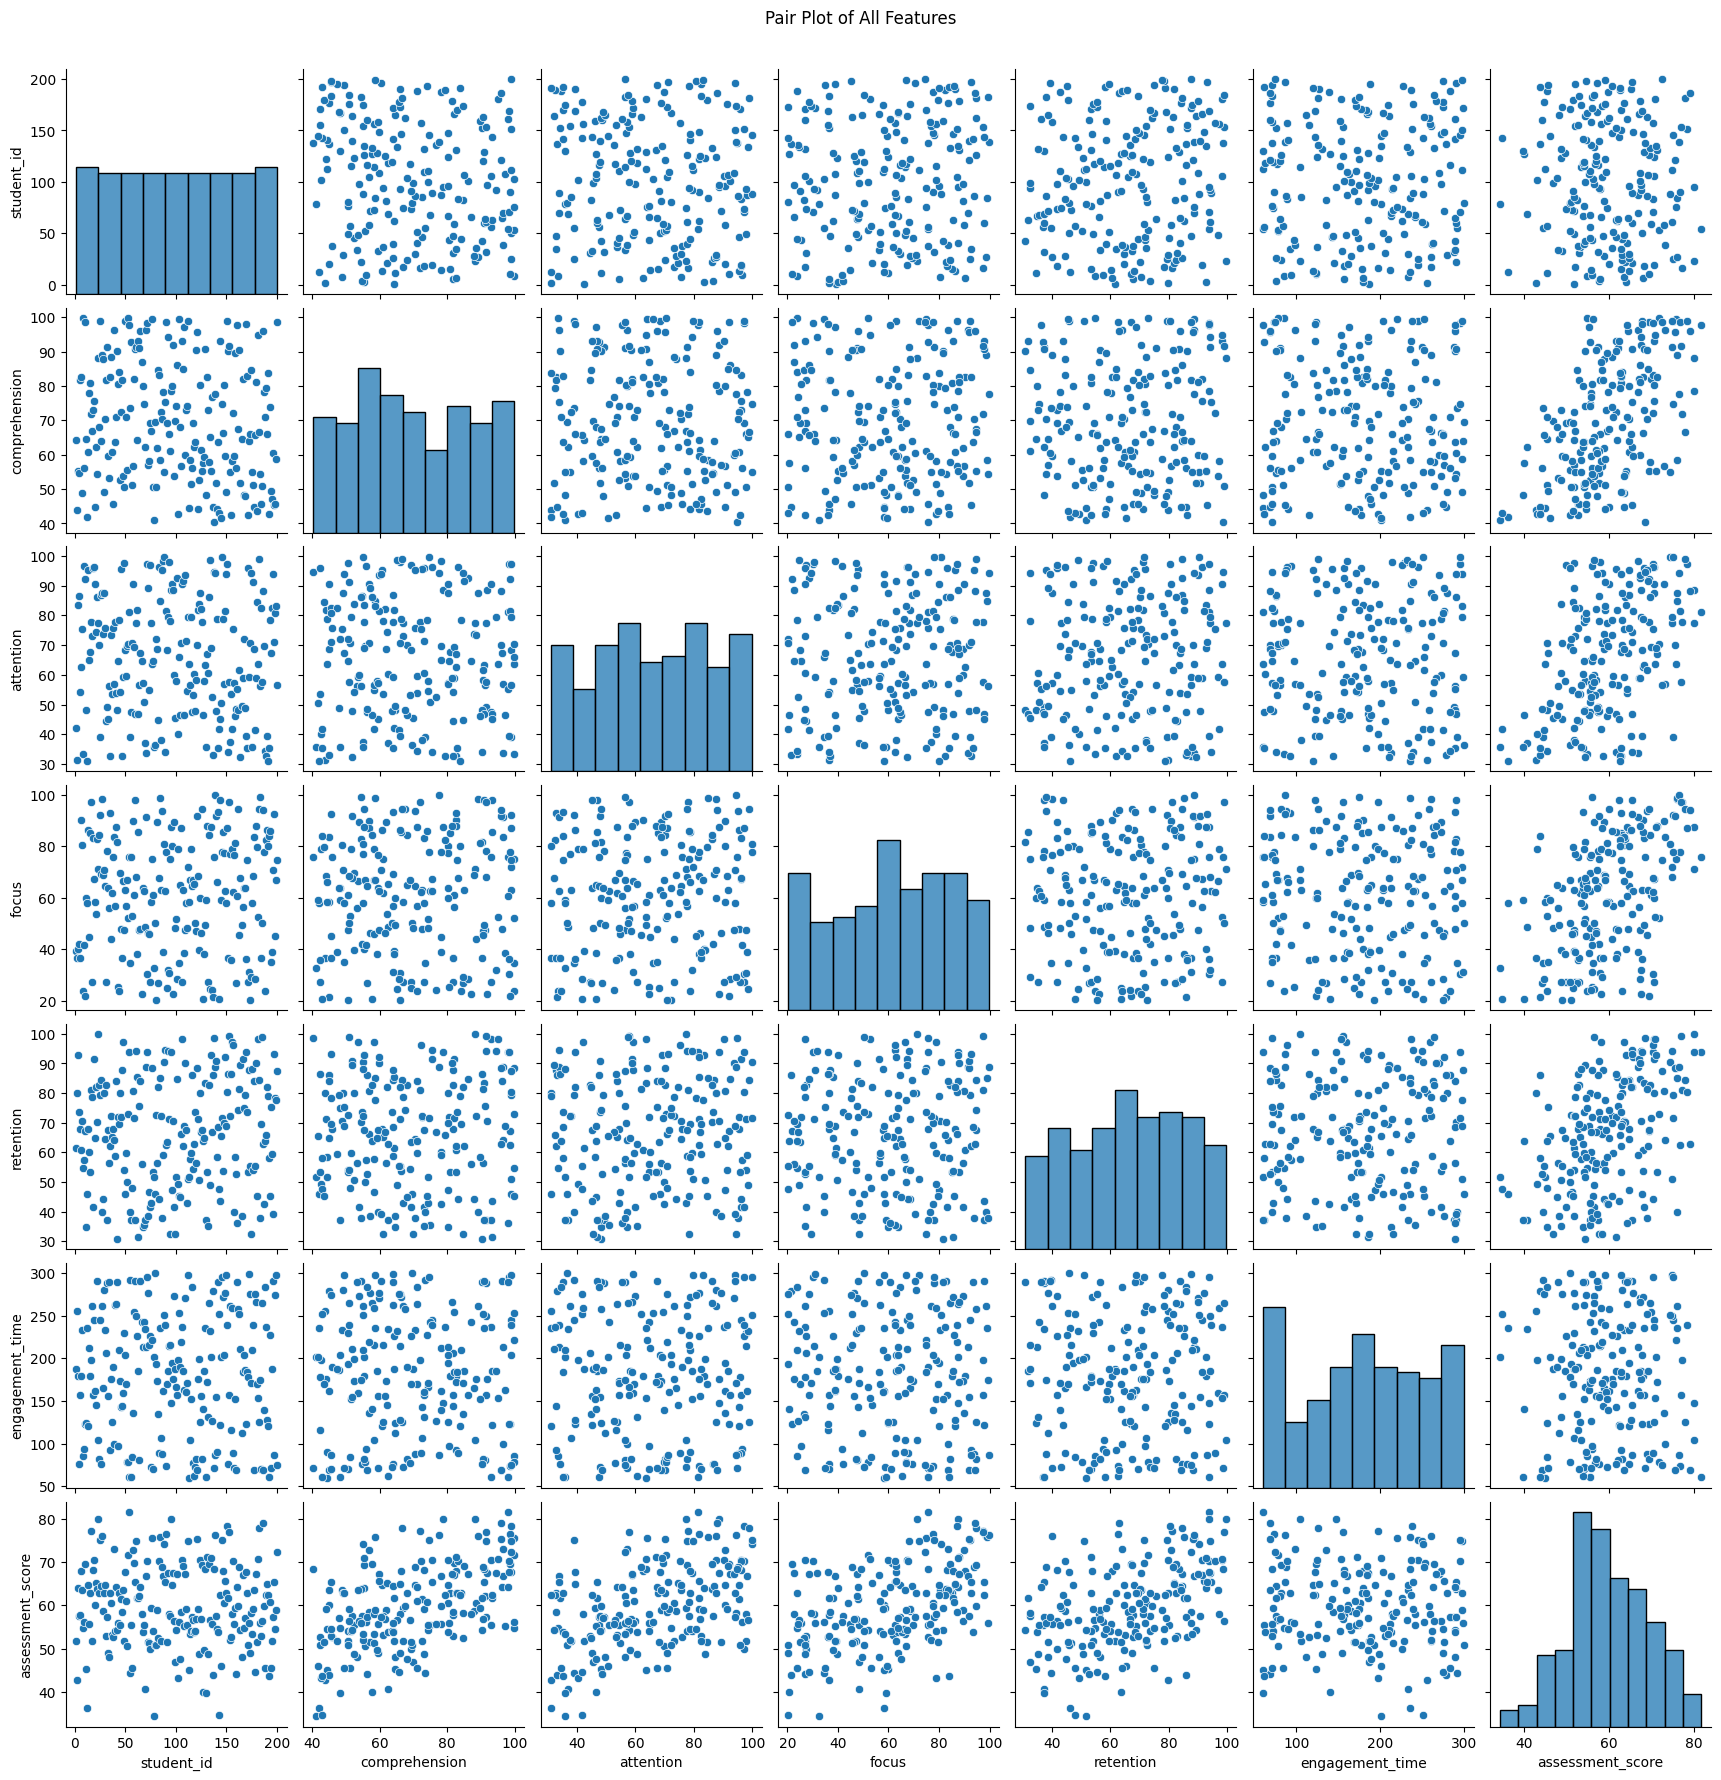

In [12]:
sns.pairplot(numeric_df)
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [14]:
# Load the dataset
df = pd.read_csv("student_data.csv")

# Select input features and target
X = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = df["assessment_score"]


In [15]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Predict on the test set
y_pred = model.predict(X_test)


In [18]:
# Calculate R² score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.8984
Mean Squared Error: 9.3420


In [19]:
# View coefficients for each feature
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                 Coefficient
comprehension       0.314173
attention           0.216283
focus               0.191435
retention           0.216485
engagement_time     0.000008


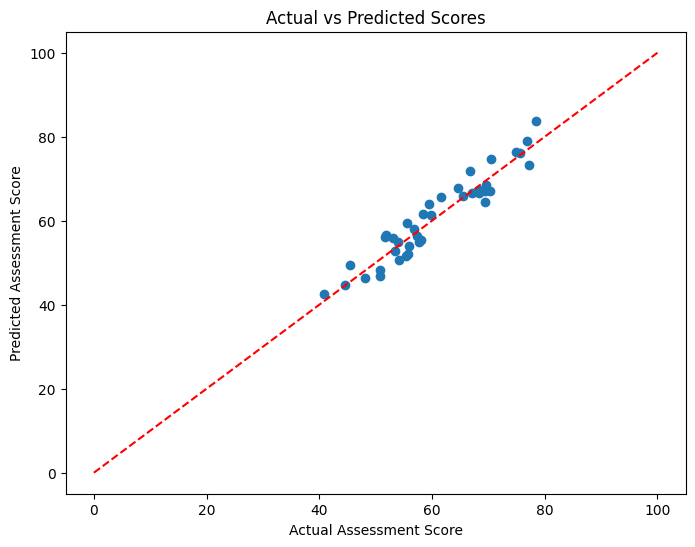

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Assessment Score")
plt.ylabel("Predicted Assessment Score")
plt.title("Actual vs Predicted Scores")
plt.plot([0, 100], [0, 100], '--', color='red')
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


In [23]:
# Calculate R² score and Mean Squared Error for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")


Random Forest R² Score: 0.8636
Random Forest Mean Squared Error: 12.5475


In [24]:
# Check how important each feature is
importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

print(importance_df)


           Feature  Importance
0    comprehension    0.361620
1        attention    0.252064
2            focus    0.198082
3        retention    0.157038
4  engagement_time    0.031197


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge R²: 0.8996327510821862
Ridge MSE: 9.22982731210181


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Best RF R²:", r2_score(y_test, y_pred_best))
print("Best RF MSE:", mean_squared_error(y_test, y_pred_best))


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best RF R²: 0.8569410514231519
Best RF MSE: 13.155779450489717


In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R² score:", scores.mean())


Cross-validation R² scores: [0.74656011 0.81119406 0.82028386 0.83299042 0.7654725 ]
Average R² score: 0.7953001912354777


In [29]:
features = ["comprehension", "attention", "focus", "retention", "engagement_time"]
X_cluster = df[features]


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


In [32]:
import numpy as np
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=features)

print("Cluster Centers:")
print(centers_df)


Cluster Centers:
   comprehension  attention      focus  retention  engagement_time
0      59.532889  72.657444  63.393000  57.673667       166.962000
1      82.133966  60.468103  79.916724  74.228103       174.116724
2      73.771538  60.543462  35.568654  73.473846       212.778269


In [33]:
# Show number of students in each cluster
print(df["cluster"].value_counts())

# Check average metrics per cluster
print(df.groupby("cluster")[features].mean())


cluster
0    90
1    58
2    52
Name: count, dtype: int64
         comprehension  attention      focus  retention  engagement_time
cluster                                                                 
0            59.532889  72.657444  63.393000  57.673667       166.962000
1            82.133966  60.468103  79.916724  74.228103       174.116724
2            73.771538  60.543462  35.568654  73.473846       212.778269


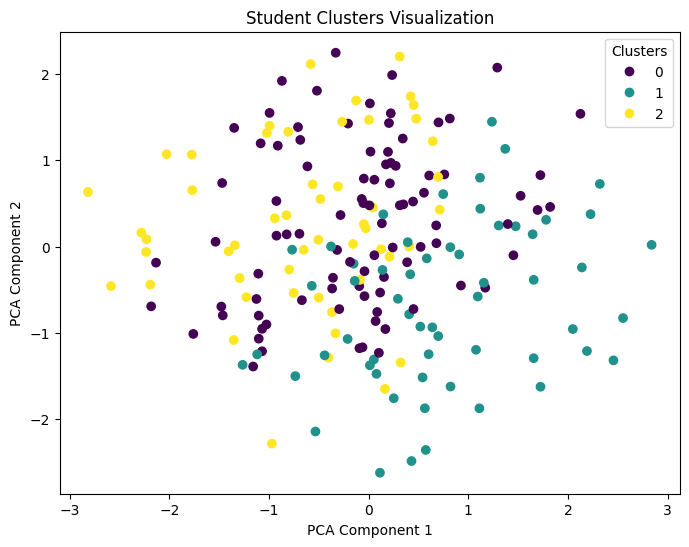

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap="viridis")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Student Clusters Visualization")
plt.show()


In [35]:
cluster_mapping = {
    0: "High Performers",
    1: "Needs Support",
    2: "Average Learners"
}

df["persona"] = df["cluster"].map(cluster_mapping)
print(df[["name", "persona"]].head())


             name           persona
0     Erika Perez  Average Learners
1    Eddie Waller  Average Learners
2  Justin Cordova  Average Learners
3     Lisa Garner   High Performers
4  Dean Blair Jr.  Average Learners


In [36]:
df.to_csv("student_data_with_clusters.csv", index=False)


In [37]:
correlation.to_csv("correlation_matrix.csv")


In [38]:
importance_df.to_csv("feature_importance.csv", index=False)


In [39]:
centers_df.to_csv("cluster_centers.csv", index=False)
